# Digits Data Classification

In [1]:
#######################################
### Import Data Processing Packages ###
#######################################

import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

########################################
### Import Machine Learning Packages ###
########################################

from sklearn.preprocessing   import StandardScaler;
from sklearn.preprocessing   import PolynomialFeatures;

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV;
from sklearn.metrics         import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error;

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis;

from sklearn.linear_model    import LinearRegression;
from sklearn.linear_model    import LogisticRegression;
from sklearn.linear_model    import Ridge;
from sklearn.linear_model    import Lasso;

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.neural_network  import MLPClassifier;

from sklearn.pipeline import Pipeline;

########################
### Import Data Sets ###
########################

from sklearn                 import datasets;

In [2]:
digits = datasets.load_digits();

# Check Head of Data
print(digits.DESCR)

# Convert to Pandas
#df = pd.DataFrame(data=np.c_[digits['data'], digits['target']], columns=np.append(digits['feature_names'], 'target'))
df = pd.DataFrame(data=np.c_[digits['data'], digits['target']], columns=np.append(np.arange(1, 65, 1), 'target'))

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

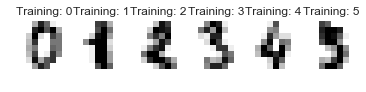

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [13]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In [14]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [ ]:
sns.pairplot(data=df, hue='target')

# Scale and Train,Test,Split

In [4]:
# Scale features to mean = 1, std = 1

scaler = StandardScaler();

scaler.fit(df.drop('target', axis=1));

scaled_df = scaler.transform(df.drop('target', axis=1));

df_feat = pd.DataFrame(scaled_df, columns=df.columns[:-1])
df_feat.describe()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-2.560865e-16,-2.347717e-16,-3.053268e-16,1.396892e-16,-3.169418e-16,-9.595984e-16,6.069466e-16,-4.623690e-16,7.550850e-17,...,4.715822e-16,-4.920321e-16,2.253538e-16,3.441259e-16,5.952698e-17,-6.114606e-16,-5.190926e-16,1.695299e-16,1.787972e-16,-6.838961e-16
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-4.097239e-01,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524e+00,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['target'], test_size=0.5);

# K Nearest Neighbors

In [17]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[92  0  0  0  0  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  0  0]
 [ 0  0 91  0  0  0  0  1  3  0]
 [ 0  0  0 87  0  0  0  2  2  0]
 [ 0  0  0  0 88  0  0  1  0  1]
 [ 0  0  0  0  0 94  2  0  1  0]
 [ 0  1  0  0  0  0 86  0  0  0]
 [ 0  0  0  0  2  1  0 94  0  1]
 [ 0  4  0  1  0  0  0  0 80  0]
 [ 0  1  0  1  0  0  0  0  0 86]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        92
        1.0       0.93      1.00      0.96        76
        2.0       1.00      0.96      0.98        95
        3.0       0.98      0.96      0.97        91
        4.0       0.98      0.98      0.98        90
        5.0       0.99      0.97      0.98        97
        6.0       0.98      0.99      0.98        87
        7.0       0.96      0.96      0.96        98
        8.0       0.93      0.94      0.94        85
        9.0       0.98      0.98      0.98        88

avg / total       0.97      0.97      0.97 

In [19]:
param_grid = [{'n_neighbors': np.arange(1, 10),
               'weights':     ['uniform', 'distance'],
               'algorithm':   ['ball_tree', 'kd_tree', 'brute']
              }]

grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.965478841871


Best Estimator


KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

# Decision Tree

In [22]:
dtree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

dtree.fit(X_train, y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(dtree, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[87  0  1  0  2  0  0  0  0  2]
 [ 0 68  3  4  0  0  0  0  1  0]
 [ 0  0 81  1  0  1  0  2  9  1]
 [ 0  5  0 72  0  5  2  1  0  6]
 [ 1  3  2  0 72  4  2  2  4  0]
 [ 0  2  1  3  4 77  1  2  5  2]
 [ 0  1  1  0  0  0 84  0  1  0]
 [ 0  0  0  3  3  1  0 83  4  4]
 [ 0  2  2  0  2  0  4  1 70  4]
 [ 2  1  0  3  2  3  0  1  3 73]]


Classification Report
             precision    recall  f1-score   support

        0.0       0.97      0.95      0.96        92
        1.0       0.83      0.89      0.86        76
        2.0       0.89      0.85      0.87        95
        3.0       0.84      0.79      0.81        91
        4.0       0.85      0.80      0.82        90
        5.0       0.85      0.79      0.82        97
        6.0       0.90      0.97      0.93        87
        7.0       0.90      0.85      0.87        98
        8.0       0.72      0.82      0.77        85
        9.0       0.79      0.83      0.81        88

avg / total       0.86      0.85      0.85 

In [21]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'splitter':  ['best', 'random'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(dtree, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.836302895323


Best Parameters
Best Estimator


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Random Forest

In [25]:
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rfc.fit(X_train,y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(rfc, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[87  0  1  0  2  0  0  0  0  2]
 [ 0 68  3  4  0  0  0  0  1  0]
 [ 0  0 81  1  0  1  0  2  9  1]
 [ 0  5  0 72  0  5  2  1  0  6]
 [ 1  3  2  0 72  4  2  2  4  0]
 [ 0  2  1  3  4 77  1  2  5  2]
 [ 0  1  1  0  0  0 84  0  1  0]
 [ 0  0  0  3  3  1  0 83  4  4]
 [ 0  2  2  0  2  0  4  1 70  4]
 [ 2  1  0  3  2  3  0  1  3 73]]


Classification Report
             precision    recall  f1-score   support

        0.0       0.97      0.95      0.96        92
        1.0       0.83      0.89      0.86        76
        2.0       0.89      0.85      0.87        95
        3.0       0.84      0.79      0.81        91
        4.0       0.85      0.80      0.82        90
        5.0       0.85      0.79      0.82        97
        6.0       0.90      0.97      0.93        87
        7.0       0.90      0.85      0.87        98
        8.0       0.72      0.82      0.77        85
        9.0       0.79      0.83      0.81        88

avg / total       0.86      0.85      0.85 

In [24]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(rfc, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.935412026726


Best Parameters
Best Estimator


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Support Vector Machine

In [28]:
svc_model = SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(svc_model, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[91  1  0  0  0  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  0  0]
 [ 0  0 90  0  0  1  0  0  4  0]
 [ 0  0  0 87  0  0  1  1  2  0]
 [ 0  0  0  1 88  0  0  0  0  1]
 [ 0  0  0  0  0 95  1  1  0  0]
 [ 0  0  0  0  0  0 87  0  0  0]
 [ 0  0  0  1  0  1  0 95  1  0]
 [ 0  1  0  0  0  0  0  0 83  1]
 [ 0  0  0  1  0  0  0  0  5 82]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        92
        1.0       0.97      1.00      0.99        76
        2.0       1.00      0.95      0.97        95
        3.0       0.97      0.96      0.96        91
        4.0       1.00      0.98      0.99        90
        5.0       0.98      0.98      0.98        97
        6.0       0.98      1.00      0.99        87
        7.0       0.98      0.97      0.97        98
        8.0       0.87      0.98      0.92        85
        9.0       0.98      0.93      0.95        88

avg / total       0.97      0.97      0.97 

In [27]:
param_grid = [{'C': np.arange(1, 3, 1),
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
              }]

grid = GridSearchCV(svc_model, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.973273942094


Best Parameters
Best Estimator


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# K Means Clustering

In [53]:
kmeans = KMeans(n_clusters=10, n_init=10);

kmeans.fit(df.drop('target', axis=1));

pred = lr.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(lr, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[82  0  0  1  0  1  0  0  0  0]
 [ 0 89  2  0  0  0  0  0  5  3]
 [ 1  0 92  1  0  0  0  0  1  0]
 [ 0  0  2 83  0  3  0  2  2  0]
 [ 0  0  0  0 81  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  2]
 [ 0  1  0  0  2  0 79  0  0  0]
 [ 0  0  0  1  0  0  0 93  0  1]
 [ 0  8  0  1  0  0  2  0 79  2]
 [ 0  0  0  0  0  2  0  2  1 89]]


Classification Report
             precision    recall  f1-score   support

        0.0       0.99      0.98      0.98        84
        1.0       0.91      0.90      0.90        99
        2.0       0.96      0.97      0.96        95
        3.0       0.95      0.90      0.93        92
        4.0       0.98      1.00      0.99        81
        5.0       0.93      0.98      0.95        85
        6.0       0.98      0.96      0.97        82
        7.0       0.96      0.98      0.97        95
        8.0       0.90      0.86      0.88        92
        9.0       0.92      0.95      0.93        94

avg / total       0.95      0.95      0.95 

# Linear Discriminant Analysis

In [7]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

pred = lda.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(lda, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning:

The priors do not sum to 1. Renormalizing

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\

Confusion Matrix
[[84  0  0  0  0  0  1  0  0  0]
 [ 0 93  0  0  0  0  0  0  4  0]
 [ 0  1 89  1  0  0  0  0  0  0]
 [ 0  0  0 85  0  3  0  0  3  0]
 [ 0  4  0  0 92  0  0  2  1  0]
 [ 0  0  0  0  0 92  1  0  1  2]
 [ 0  0  0  0  1  0 94  0  0  1]
 [ 0  0  0  0  1  0  0 75  1  0]
 [ 0  6  0  0  0  1  0  1 70  1]
 [ 0  1  0  2  0  2  0  0  1 82]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        85
        1.0       0.89      0.96      0.92        97
        2.0       1.00      0.98      0.99        91
        3.0       0.97      0.93      0.95        91
        4.0       0.98      0.93      0.95        99
        5.0       0.94      0.96      0.95        96
        6.0       0.98      0.98      0.98        96
        7.0       0.96      0.97      0.97        77
        8.0       0.86      0.89      0.87        79
        9.0       0.95      0.93      0.94        88

avg / total       0.95      0.95      0.95 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.



# Quadratic Discriminant Analysis

In [8]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

pred = qda.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(qda, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear



Confusion Matrix
[[83  0  0  0  1  0  0  0  1  0]
 [ 0 59  6  1  0  0  0  4 27  0]
 [ 0  4 76  1  0  0  0  0 10  0]
 [ 0  0  0 85  0  0  0  1  4  1]
 [ 1  1  0  0 64  0  0 28  5  0]
 [ 1  2  0 25  0 28  1 10 29  0]
 [ 1  1  1  0  0  1 89  0  3  0]
 [ 0  0  0  0  0  0  0 75  1  1]
 [ 0  0  0  0  0  0  0  3 76  0]
 [ 3  4  0 19  4  0  0  8 19 31]]


Classification Report
             precision    recall  f1-score   support

        0.0       0.93      0.98      0.95        85
        1.0       0.83      0.61      0.70        97
        2.0       0.92      0.84      0.87        91
        3.0       0.65      0.93      0.77        91
        4.0       0.93      0.65      0.76        99
        5.0       0.97      0.29      0.45        96
        6.0       0.99      0.93      0.96        96
        7.0       0.58      0.97      0.73        77
        8.0       0.43      0.96      0.60        79
        9.0       0.94      0.35      0.51        88

avg / total       0.83      0.74      0.73 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear



# Logistic Regression

In [12]:
lr = LogisticRegression();

lr.fit(X_train, y_train)

pred = lr.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(lr, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[82  0  0  1  0  1  0  0  0  0]
 [ 0 89  2  0  0  0  0  0  5  3]
 [ 1  0 92  1  0  0  0  0  1  0]
 [ 0  0  2 83  0  3  0  2  2  0]
 [ 0  0  0  0 81  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  2]
 [ 0  1  0  0  2  0 79  0  0  0]
 [ 0  0  0  1  0  0  0 93  0  1]
 [ 0  8  0  1  0  0  2  0 79  2]
 [ 0  0  0  0  0  2  0  2  1 89]]


Classification Report
             precision    recall  f1-score   support

        0.0       0.99      0.98      0.98        84
        1.0       0.91      0.90      0.90        99
        2.0       0.96      0.97      0.96        95
        3.0       0.95      0.90      0.93        92
        4.0       0.98      1.00      0.99        81
        5.0       0.93      0.98      0.95        85
        6.0       0.98      0.96      0.97        82
        7.0       0.96      0.98      0.97        95
        8.0       0.90      0.86      0.88        92
        9.0       0.92      0.95      0.93        94

avg / total       0.95      0.95      0.95 

In [ ]:
param_grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']
              }]

grid = GridSearchCV(lr, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

# Principle Component Analysis with Logistic Regression

In [47]:
print(xx.shape)
print(yy.shape)
print(Z.shape)
print(927*949)
print(np.asarray(Z).ndim)

(927, 949)
(927, 949)
(879723,)
879723
1


(1797, 64)
(1797, 2)


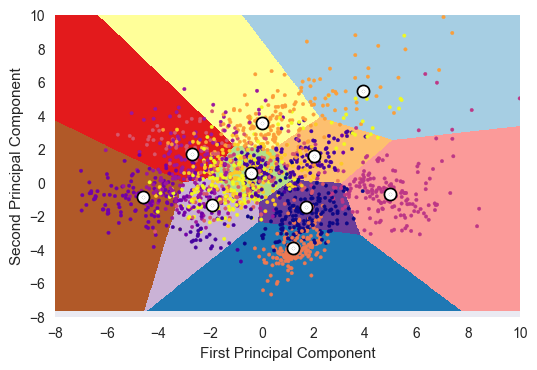

In [65]:
pca = PCA(n_components=2);
pca.fit(scaled_df);

x_pca = pca.transform(scaled_df);

print(scaled_df.shape);
print(x_pca.shape);

kmeans = KMeans(n_clusters=10, n_init=10);
kmeans.fit(x_pca);

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot

fig  = plt.figure(figsize=(6, 4), dpi=100);

axes1 = fig.add_subplot(111); 

axes1.scatter(x_pca[:,0], x_pca[:,1], c=df['target'], cmap='plasma', s=6)
axes1.set_xlabel('First Principal Component')
axes1.set_ylabel('Second Principal Component')
axes1.set_xlim(-8, 10)
axes1.set_ylim(-8, 10)
axes1.grid(False)

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

centroids = kmeans.cluster_centers_
axes1.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=99, linewidths=5, color='black', zorder=10)
axes1.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=25, linewidths=5, color='white', zorder=10)

In [37]:
wine.drop('class', axis=1).columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'phenols', 'flavanoids', 'non_flavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'OD', 'proline'],
      dtype='object')

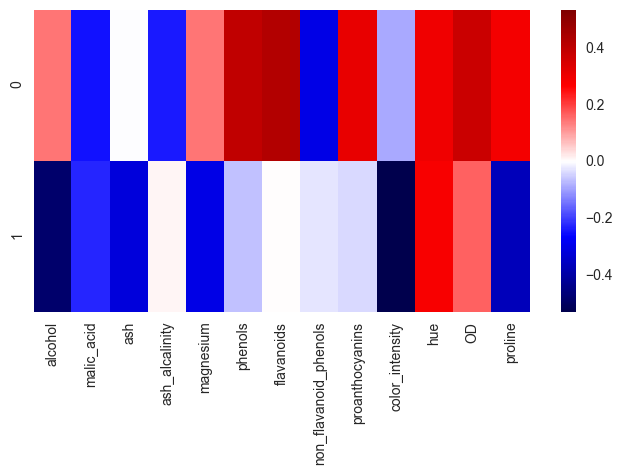

In [40]:
df_comp = pd.DataFrame(pca.components_, columns=['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'phenols', 'flavanoids', 
                            'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD', 'proline'])

fig  = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(111); 

sns.heatmap(df_comp, cmap='seismic', ax=axes1)

In [39]:
df = pd.DataFrame(data=np.array([x_pca[:,0],x_pca[:,1]]).transpose())

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df, df['target'], test_size=0.5);

KeyError: 'target'

In [43]:
knn = KNeighborsClassifier(n_neighbors=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[92  0  0  0  0  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  0  0]
 [ 0  0 92  1  0  0  0  1  1  0]
 [ 0  0  0 87  0  0  0  1  2  1]
 [ 0  0  0  0 90  0  0  0  0  0]
 [ 0  0  0  0  0 94  1  0  1  1]
 [ 0  1  0  0  0  0 86  0  0  0]
 [ 0  0  0  0  2  1  0 94  0  1]
 [ 0  3  0  1  0  1  0  0 79  1]
 [ 0  1  0  3  2  0  0  0  1 81]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        92
        1.0       0.94      1.00      0.97        76
        2.0       1.00      0.97      0.98        95
        3.0       0.95      0.96      0.95        91
        4.0       0.96      1.00      0.98        90
        5.0       0.98      0.97      0.97        97
        6.0       0.99      0.99      0.99        87
        7.0       0.98      0.96      0.97        98
        8.0       0.94      0.93      0.93        85
        9.0       0.95      0.92      0.94        88

avg / total       0.97      0.97      0.97 

KeyError: 'target'

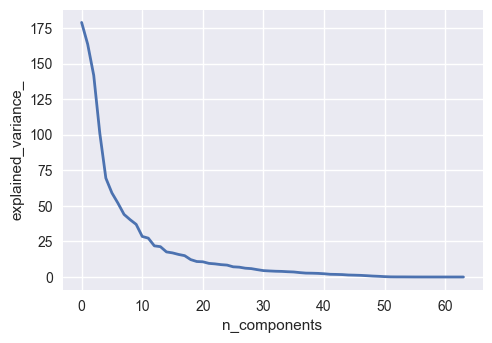

In [36]:
logistic = LogisticRegression()

pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)

plt.figure(1, figsize=(6, 4), dpi=100)
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

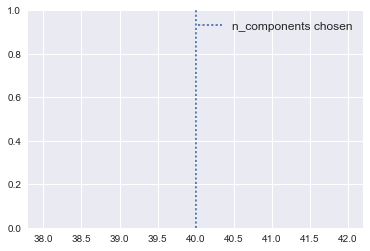

In [37]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

# Multi-Layer Perceptron

In [50]:
clf = MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

clf.fit(X_train,y_train);

pred = clf.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(clf, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[91  0  1  0  0  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  0  0]
 [ 0  0 95  0  0  0  0  0  0  0]
 [ 0  0  0 84  0  3  0  2  1  1]
 [ 0  0  0  0 89  0  0  0  0  1]
 [ 0  0  0  1  0 93  1  0  0  2]
 [ 0  0  0  0  0  1 86  0  0  0]
 [ 0  0  0  0  2  0  0 95  0  1]
 [ 0  1  0  0  0  1  0  0 83  0]
 [ 0  0  0  2  0  0  0  0  1 85]]


Classification Report
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        92
        1.0       0.99      1.00      0.99        76
        2.0       0.99      1.00      0.99        95
        3.0       0.97      0.92      0.94        91
        4.0       0.98      0.99      0.98        90
        5.0       0.95      0.96      0.95        97
        6.0       0.99      0.99      0.99        87
        7.0       0.98      0.97      0.97        98
        8.0       0.98      0.98      0.98        85
        9.0       0.94      0.97      0.96        88

avg / total       0.98      0.98      0.98 

In [48]:
param_grid = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
               'learning_rate': ['constant', 'invscaling', 'adaptive'],
               'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }]

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Score')
#print(grid.cv_results_['mean_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_
print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.972160356347


Best Parameters


Best Estimator


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)